# Bank Marketing dataset - Data Analysis
## Data description - Studying the data
## Data cleaning
## Data exploratory analysis - Data Visualization

### Importing the required libraries

In [276]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import math
import plotly.graph_objects as pl

### Loading the dataset

In [277]:
#Getting the current working directory 
os.getcwd()

'/Users/aishwaryamaddimsetty/Downloads'

In [278]:
#Changing the working directory location to load the dataset.
os.chdir('/Users/aishwaryamaddimsetty/Downloads')

In [279]:
#Importing the dataset from my local computer and assigning it to a variable:
data = pd.read_csv('DSA_DataSet.csv')

### Studying the dataset - basic summary statistics, understanding what the dataset comprises etc.

In [280]:
#Printing the first 5 rows of the dataset - just a look at the data
data.head(5)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,261,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.932750,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,149,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.953579,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,226,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.945724,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,151,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.933875,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,307,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,0.940996,no


In [281]:
#Printing the number of rows and columns of the dataset:
data.shape

(41188, 22)

In [282]:
#Printing the details about the columns of the dataset:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 22 columns):
age                41188 non-null int64
job                41188 non-null object
marital            41188 non-null object
education          41188 non-null object
default            41188 non-null object
housing            41188 non-null object
loan               41188 non-null object
contact            41188 non-null object
month              41188 non-null object
day_of_week        41188 non-null object
duration           41188 non-null int64
campaign           41188 non-null int64
pdays              41188 non-null int64
previous           41188 non-null int64
poutcome           41188 non-null object
emp.var.rate       41188 non-null float64
cons.price.idx     41188 non-null float64
cons.conf.idx      41188 non-null float64
euribor3m          41188 non-null float64
nr.employed        41188 non-null float64
ModelPrediction    41188 non-null float64
y                  41188 non-

#### *This shows the data has no missing values so no handling required for missing data in data cleaning part*

In [283]:
#Printing the datatypes of the columns:
data.dtypes

age                  int64
job                 object
marital             object
education           object
default             object
housing             object
loan                object
contact             object
month               object
day_of_week         object
duration             int64
campaign             int64
pdays                int64
previous             int64
poutcome            object
emp.var.rate       float64
cons.price.idx     float64
cons.conf.idx      float64
euribor3m          float64
nr.employed        float64
ModelPrediction    float64
y                   object
dtype: object

In [284]:
#Printing the basic summary statistics of the dataset:
data.describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,ModelPrediction
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911,0.887597
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528,0.125351
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000,0.250174
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000,0.857484
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000,0.945879
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000,0.959214
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000,0.988360


In [285]:
#Printing the number of nulls in the dataset (though we know from above step(data.info) we have all non null columns):
data.isnull().sum()

age                0
job                0
marital            0
education          0
default            0
housing            0
loan               0
contact            0
month              0
day_of_week        0
duration           0
campaign           0
pdays              0
previous           0
poutcome           0
emp.var.rate       0
cons.price.idx     0
cons.conf.idx      0
euribor3m          0
nr.employed        0
ModelPrediction    0
y                  0
dtype: int64

In [286]:
#Small code to get counts of each category present in the data's catogorical columns:

category_column = [i for i in data.columns if data[i].dtypes == 'object']

for column in category_column:
    print(column, '\n\n')
    print(data[column].value_counts())
    print("---" *20)

job 


admin.           10422
blue-collar       9254
technician        6743
services          3969
management        2924
retired           1720
entrepreneur      1456
self-employed     1421
housemaid         1060
unemployed        1014
student            875
unknown            330
Name: job, dtype: int64
------------------------------------------------------------
marital 


married     24928
single      11568
divorced     4612
unknown        80
Name: marital, dtype: int64
------------------------------------------------------------
education 


university.degree      12168
high.school             9515
basic.9y                6045
professional.course     5243
basic.4y                4176
basic.6y                2292
unknown                 1731
illiterate                18
Name: education, dtype: int64
------------------------------------------------------------
default 


no         32588
unknown     8597
yes            3
Name: default, dtype: int64
----------------------------------

In [287]:
#Used the term 'target' as the variable, since that is our result
target_count = data['y'].value_counts()
target_count

no     36548
yes     4640
Name: y, dtype: int64

#### *Can infer from above analysis that the data is imbalanced, given that "Nos" are 88.73% of the dataset compared to the "Yes's".*


### Exploratory Data Analysis (EDA)- Data Visualization

In [288]:
#Analysing the column ('y') visually - Yess and Nos

colors = ['Red', 'Green']
trace = pl.Pie(labels =target_count.index, values = target_count.values, pull= [0.05], marker=dict(colors=colors)) 

layout = pl.Layout(title = "Subscribed to the Term Deposit", height = 200, legend= dict(x=1.1, y=1.3))



fig = pl.Figure(data=[trace], layout = layout)

fig.update_layout(height=500, width=600)
fig.show()


#### Visualization of the data based on data type of the columns 
#### (Categorical or Numerical).
#### Bar charts to understand the distribution of values within the column
#### Countplots to understand the distribution of values with in the column
#### and corresponding to target column ( Subscribed or Not)

#### This univariate analysis is to understand, the column's distribution and insights on if any sub category within the column has a significance to subscribing or not. 

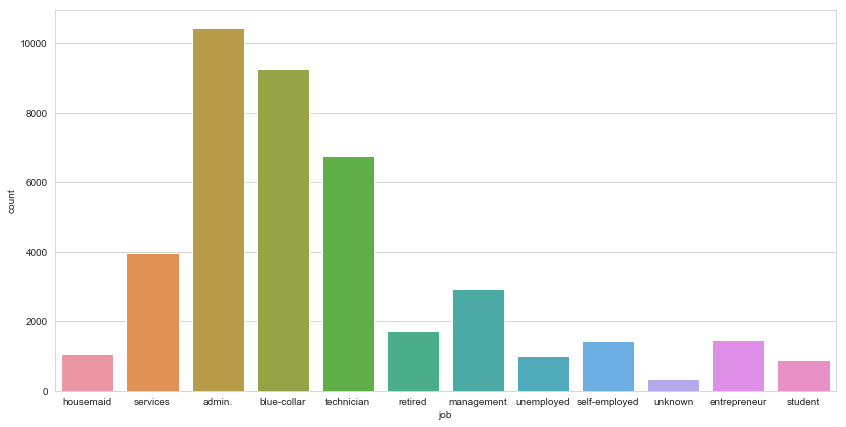

In [289]:
# JOB
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['job'])


#### From above graph, we can say, in the data, clients with admin, blue_collar and technician ctegory jobs are high compared to other job categories.

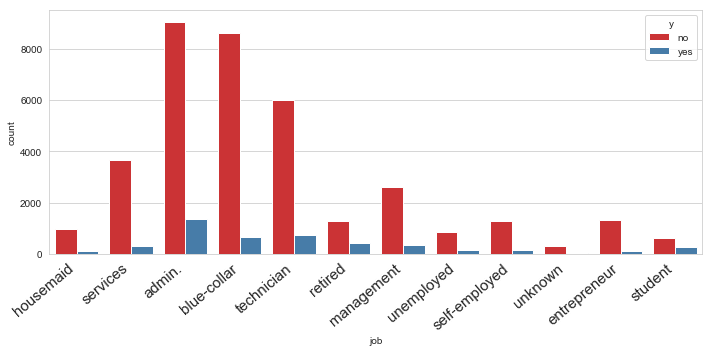

In [290]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='job', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right", size=15)

plt.tight_layout()


plt.show()

#### From above graph, we can infer that highest number of subscriptions are clients with admin job, next highest is technicians. But point here to be noted is that we also have a very high number of clients in that job category who did not subscribe. This is because simply there are more clients in our dataset who fall in that category of job.

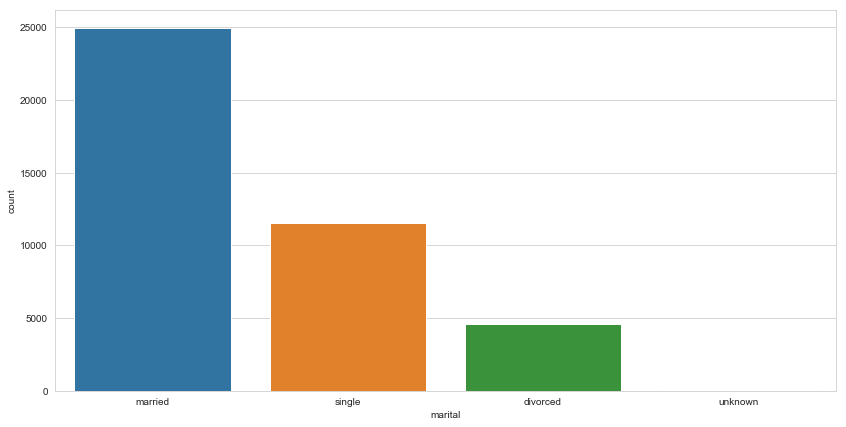

In [291]:
# MARITAL
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['marital'])

#### Simple insight is that the we have majority of this column's distribution in married category. 

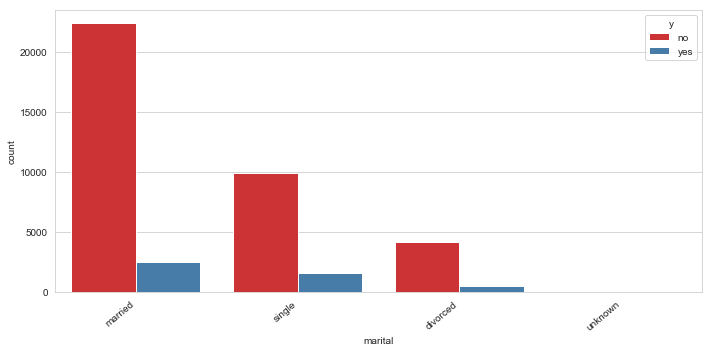

In [292]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='marital', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

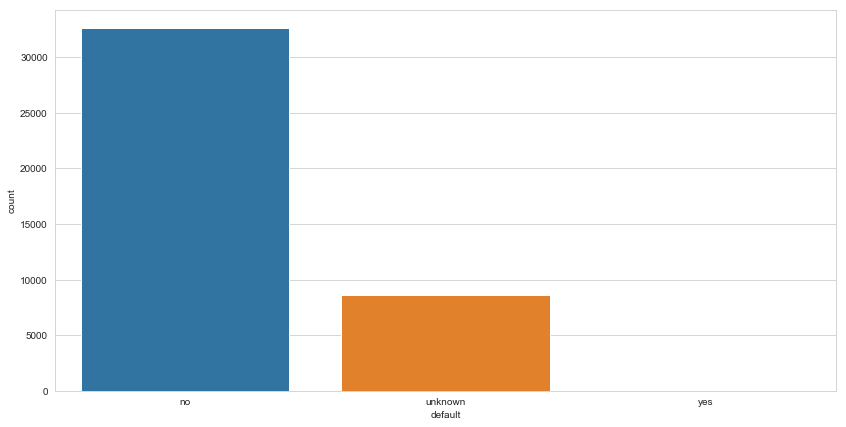

In [293]:
#DEFAULT
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['default'])

#### From the above graph, it looks like we barely have clients who have credit, major of them do not have credit.

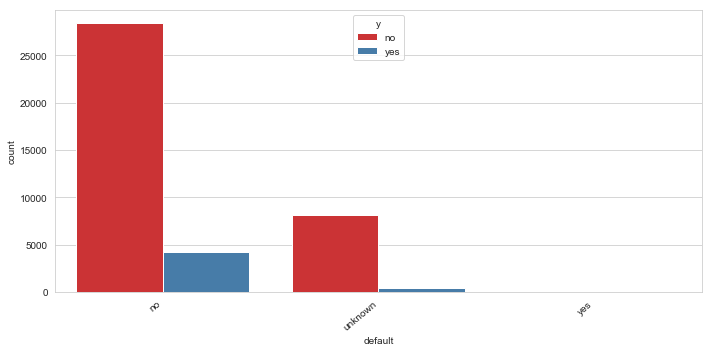

In [294]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='default', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

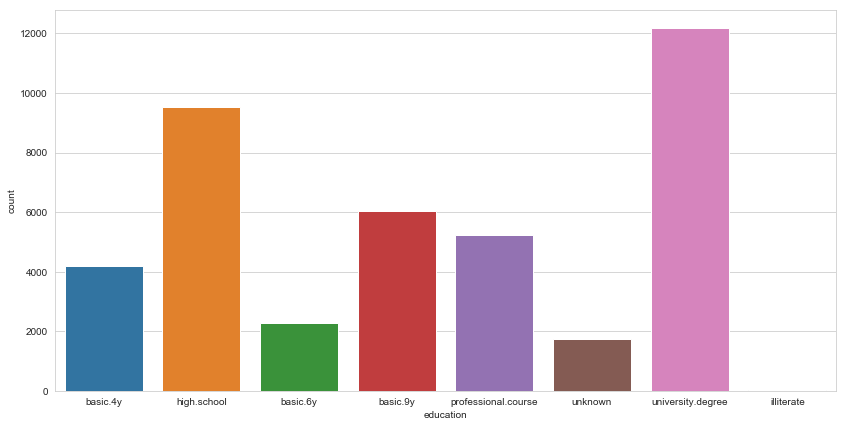

In [295]:
#EDUCATION
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['education'])

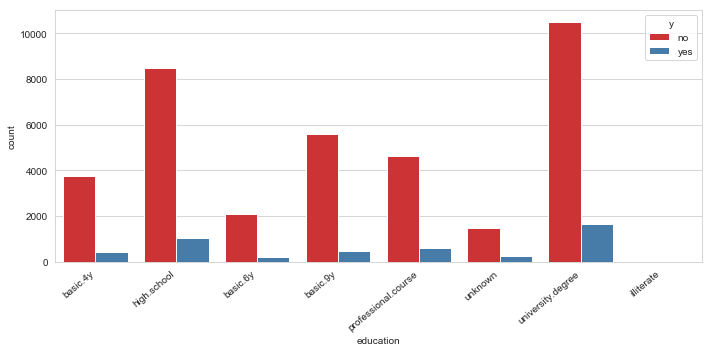

In [296]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='education', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

#### From above graphs on education, we can infer that, clients with university degree are a majority, and also highest number of subscribers are also clients with university degree.

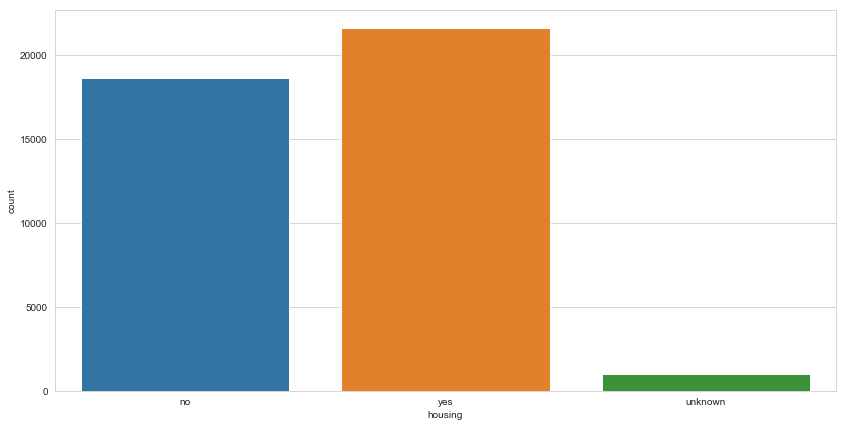

In [297]:
# HOUSING
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['housing'])

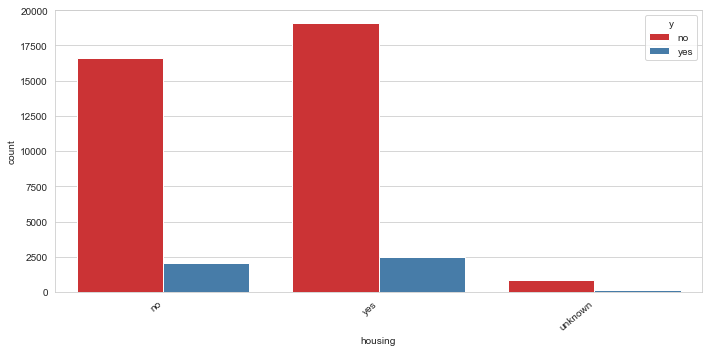

In [298]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='housing', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

#### We can see that, majority of the clients have a housing loan. One direction we can go for further analysis is that we dig deeper in clients with any kind of loans and if they have subscribed or not.

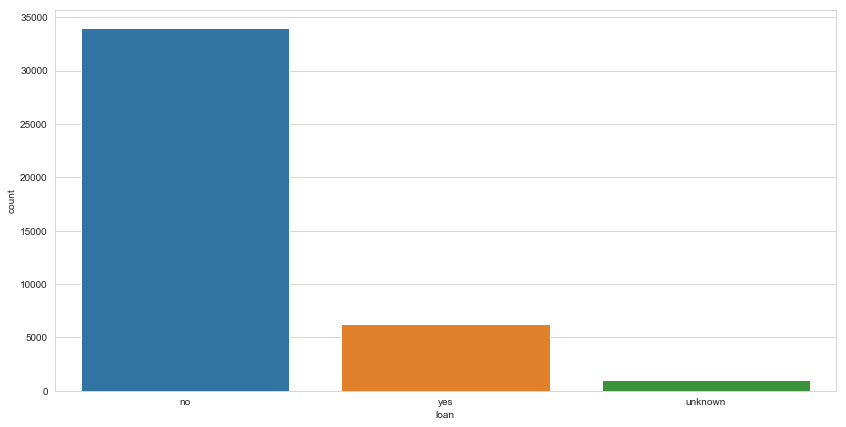

In [299]:
#LOAN
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['loan'])

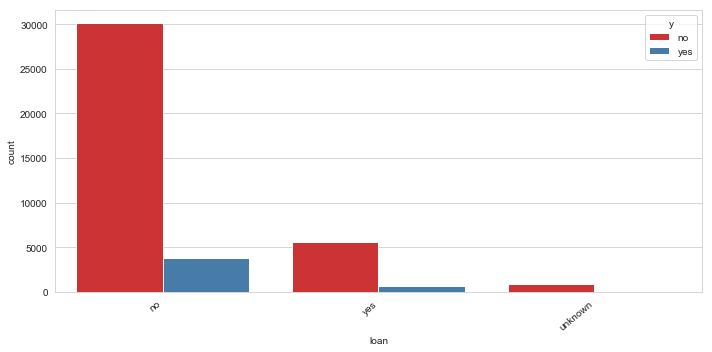

In [300]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='loan', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

#### We observe that there are more clients without a personal loan, who have subscribed. But we see that a huge number of clients with no personal loan also , din't subscribe to the deposit. So we can't really say that, peopel with and without loans hold any significance in subscribing or not.

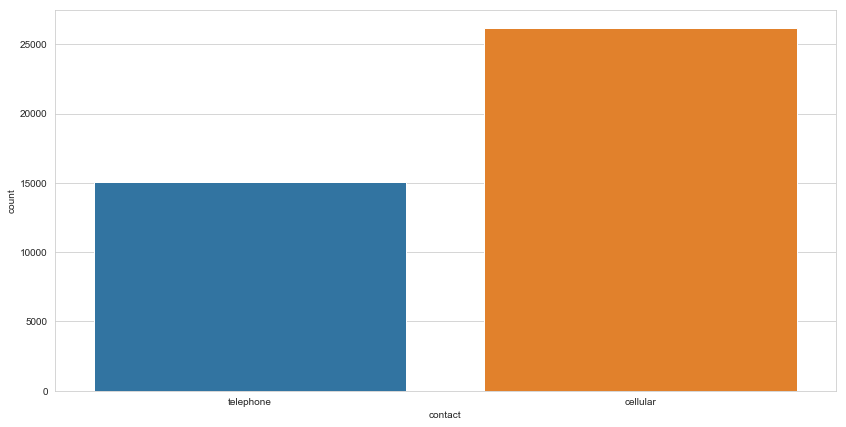

In [301]:
#CONTACT
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['contact'])

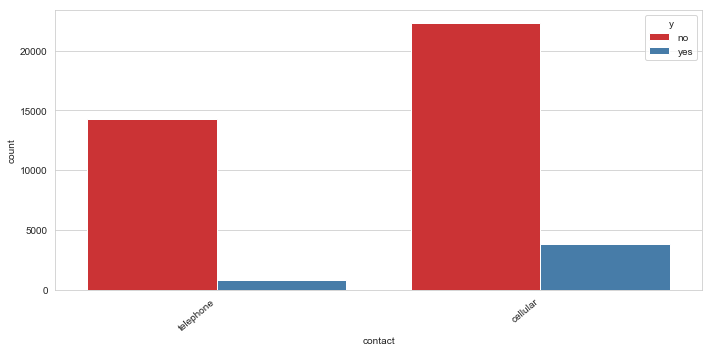

In [302]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='contact', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

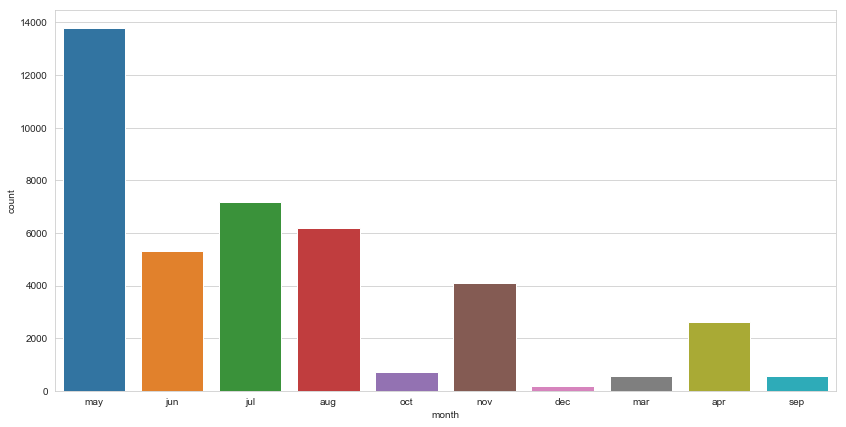

In [303]:
#MONTH
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['month'])

#### We can infer from plot above that, maximum number of clients were contacted in the month of May. ( Range can be set as May to August). 

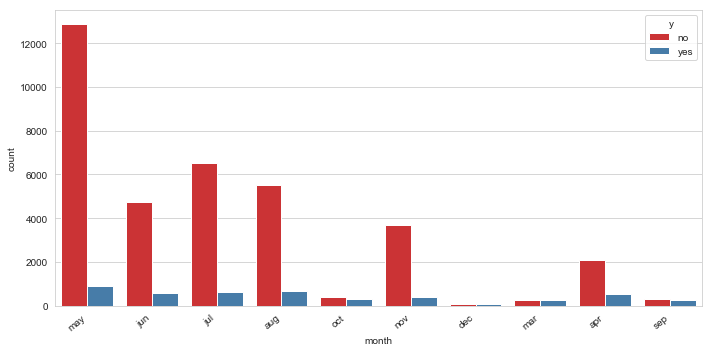

In [304]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='month', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

#### First observation for me is that , there has been very little activity in the month of december.(understandable that it's holiday month). We can say that, there are very few clients who have subscribed in comparision to number of people contacted in summer months. And, rough analysis can be said that in march, april, september and october are a little more succesive months in comparision to other months.

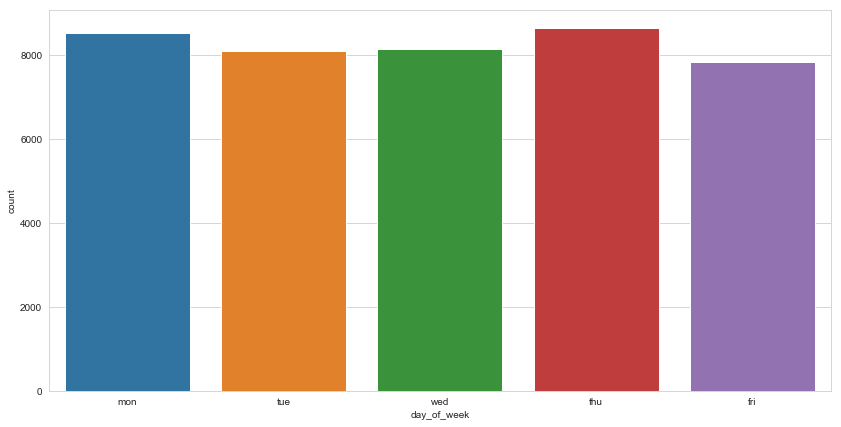

In [305]:
#DAY OF THE WEEK
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['day_of_week'])

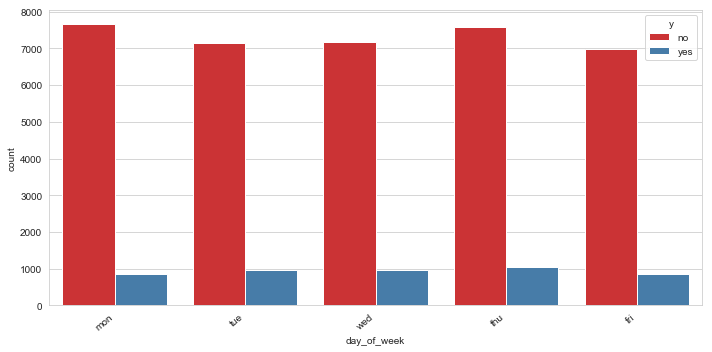

In [306]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='day_of_week', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

#### By first look of the plot, can infer that averagly number of clients who have subscribed are roughly same through out the week. irrespective of the day of contact, roughly 1000 clients have subscribed. So one underatdning is that, this column wont hold any significance in predicting, due to it's lack of any significance between sub categories.

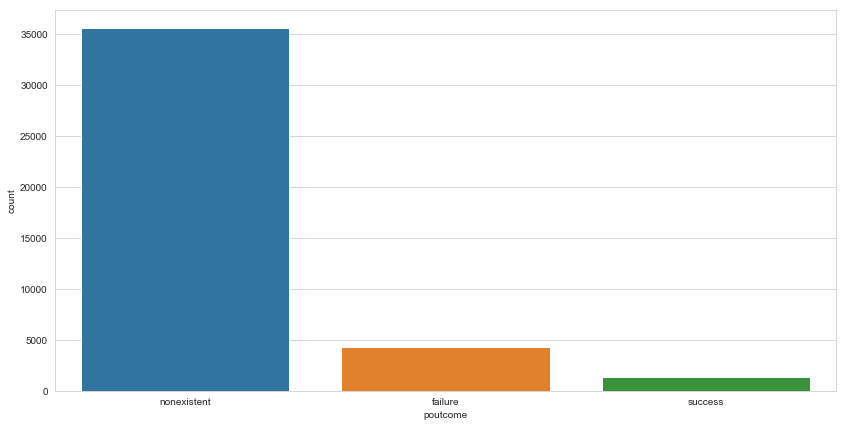

In [307]:
#POUTCOME
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['poutcome'])

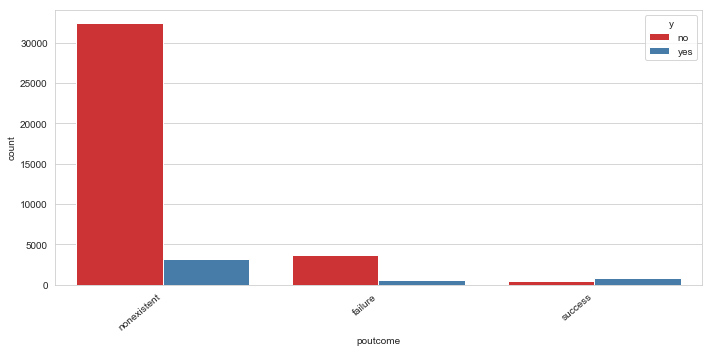

In [308]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x='poutcome', hue= 'y', data = data, palette = 'Set1')
ax.set_xticklabels(ax.get_xticklabels(), rotation = 40, ha = "right")
plt.tight_layout()

plt.show()

#### Analysis for this column is that, number of people who have previously subscribed have subscribed for this new term aswell. So it has some significance in predicting. One other insight is that majority of the customers are new customers and this is derived from the bar that shows, there is a huge nummber of clients for whom , previous outcome is unknown. hence ...

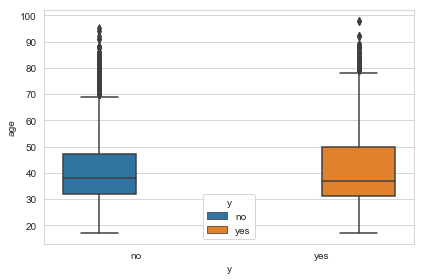

In [309]:
sns.boxplot(data = data, x = 'y', y = 'age', hue = "y")
plt.tight_layout()

#### *The boxplot above helps me understand that , the customers who are in this dataset (targeted in the campaign)'s median age is between 35 to 40.'*
####  *Both the boxplots ( Yes and No) have similar width ,meaning age isn't playing a significant role if people have subscribed or not*

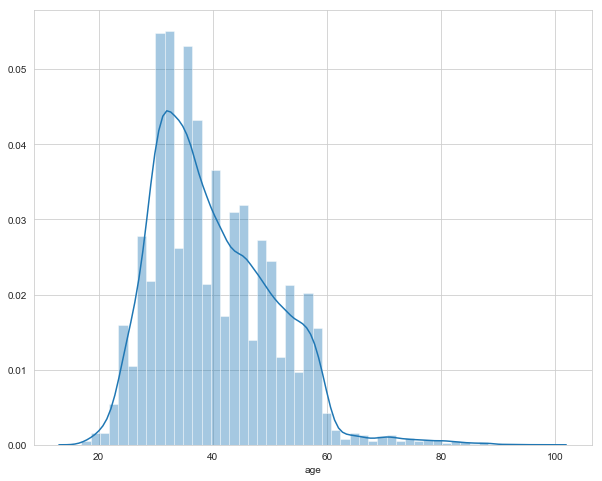

In [310]:
plt.figure(figsize=(10,8))
sns.distplot(data["age"])

#### *As we can see in the above distribution also, that most of the customers are in the age range of 30-50. Histogram helps us understand the column distrubtion*

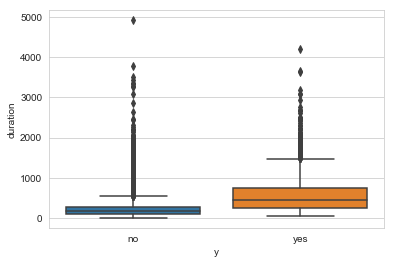

In [311]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="duration")
plt.show()

#### *From the above plot it is clear that, the duration (last contact duration) of a customer can be useful for predicting the target variable. It is expected because it is already mentioned in the data overview that this field highely affects the target variable and should only be used for benchmark purposes.*

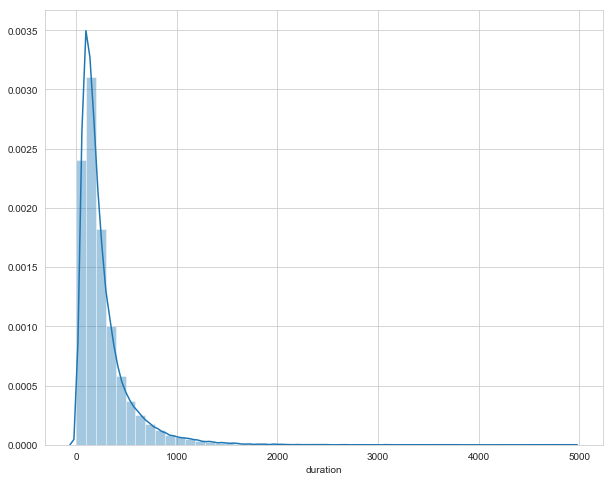

In [312]:
plt.figure(figsize=(10,8))
sns.distplot(data["duration"])
plt.show()

#### *This seems like a powerlaw distribution where most the values are very low and very few have high values.*

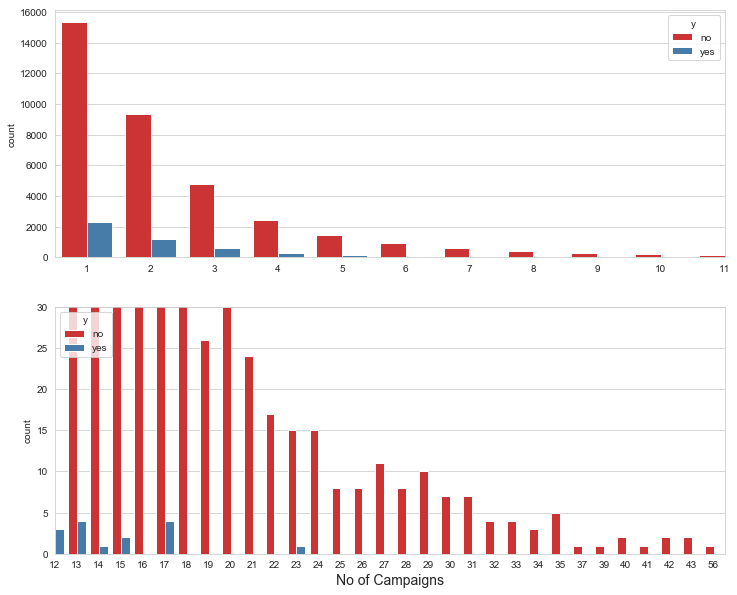

In [313]:
plt.figure(figsize=(12,10))
plt.subplot(2,1,1)
sns.countplot(x='campaign', hue = 'y', data = data, palette ='Set1')
plt.xlim(right = 10)
plt.xlabel('')
plt.subplot(2,1,2)
sns.countplot(x='campaign', hue = 'y', data = data, palette = 'Set1')
plt.xlim(left = 11)
plt.ylim(top = 30)
plt.xlabel('No of Campaigns', fontsize = 14)
plt.show()

#### This attribute tells us the number of time , teh client was contacted in this campaign. Can be observed that, more number of times the contact , less subscriptions.

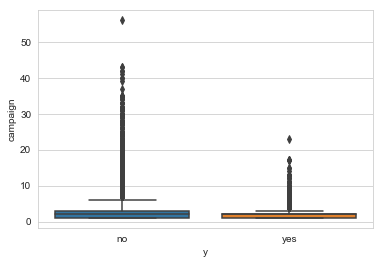

In [314]:
sns.boxplot(data=data, x="y", y="campaign")
plt.show()

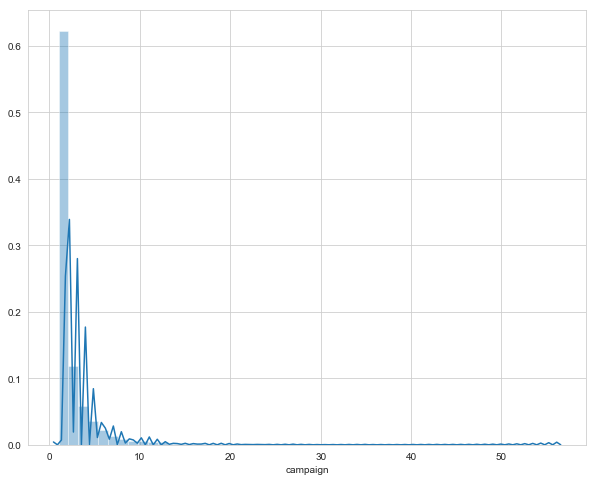

In [315]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["campaign"])
plt.show()

In [316]:
data['pdays'].unique()

array([999,   6,   4,   3,   5,   1,   0,  10,   7,   8,   9,  11,   2,
        12,  13,  14,  15,  16,  21,  17,  18,  22,  25,  26,  19,  27,
        20])

In [317]:
data['pdays'].value_counts()

999    39673
3        439
6        412
4        118
9         64
2         61
7         60
12        58
10        52
5         46
13        36
11        28
1         26
15        24
14        20
8         18
0         15
16        11
17         8
18         7
19         3
22         3
21         2
26         1
20         1
25         1
27         1
Name: pdays, dtype: int64

#### *Most of the values are 999, which means that the most of the customers have never been contacted before*

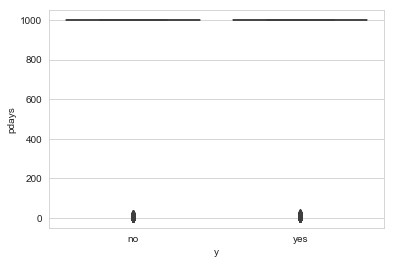

In [318]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="pdays")
plt.show()

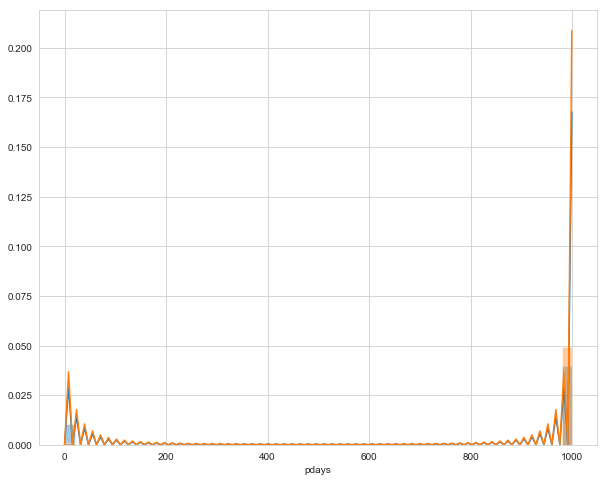

In [319]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["pdays"])
sns.distplot(data[data["y"]=="no"]["pdays"])
plt.show()

In [320]:
data["previous"].unique()

array([0, 1, 2, 3, 4, 5, 6, 7])

In [321]:
data["previous"].value_counts()

0    35563
1     4561
2      754
3      216
4       70
5       18
6        5
7        1
Name: previous, dtype: int64

In [322]:
data[data["y"]=="yes"]["previous"].value_counts()

0    3141
1     967
2     350
3     128
4      38
5      13
6       3
Name: previous, dtype: int64

In [323]:
data[data["y"]=="no"]["previous"].value_counts()

0    32422
1     3594
2      404
3       88
4       32
5        5
6        2
7        1
Name: previous, dtype: int64

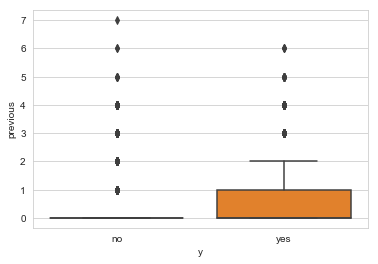

In [324]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="previous")
plt.show()

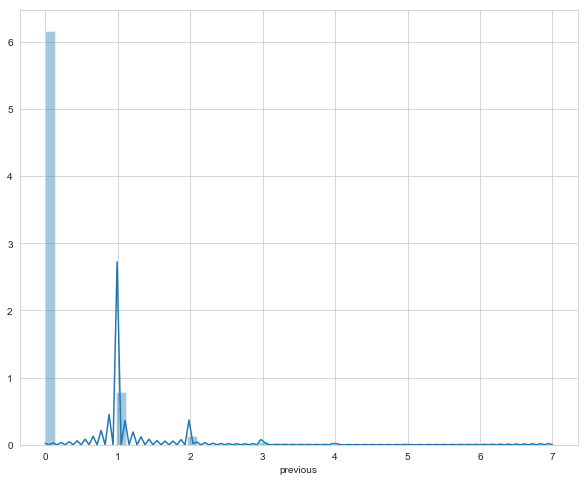

In [325]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["previous"])
plt.show()

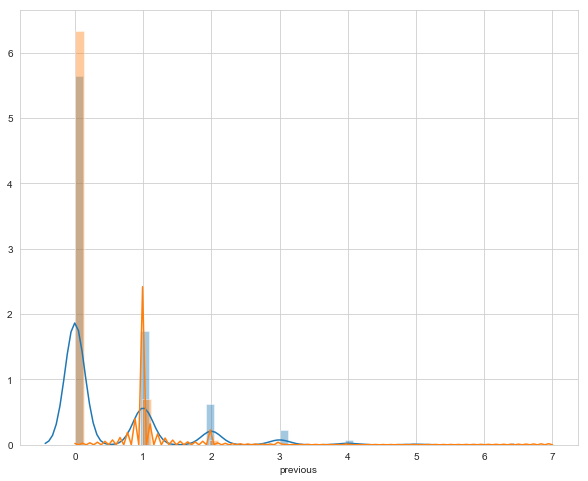

In [326]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data[data["y"]=="yes"]["previous"])
sns.distplot(data[data["y"]=="no"]["previous"])
plt.show()

#### *The previous feature is very similarly distributed for both the classes in the target variable. From basic EDA it is not sure how much value this individual feature have on the target variable.*

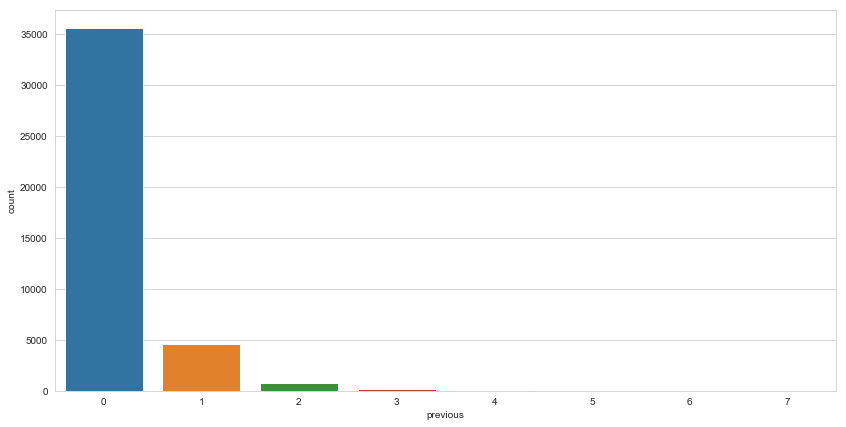

In [327]:
# Marital
sns.set_style('whitegrid')
plt.figure(figsize=(14,7))
sns.countplot(data['previous'])

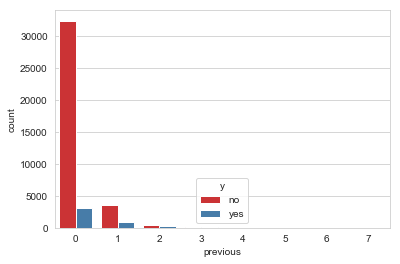

In [328]:
# Easy count plots:
sns.countplot(x='previous', hue= 'y', data = data, palette= 'Set1')
plt.show()



In [329]:
data["emp.var.rate"].value_counts()

 1.4    16234
-1.8     9184
 1.1     7763
-0.1     3683
-2.9     1663
-3.4     1071
-1.7      773
-1.1      635
-3.0      172
-0.2       10
Name: emp.var.rate, dtype: int64

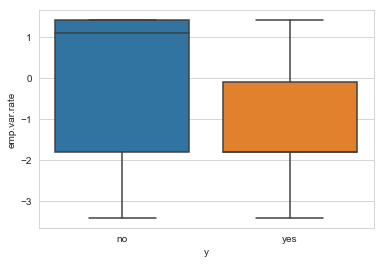

In [330]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="emp.var.rate")
plt.show()

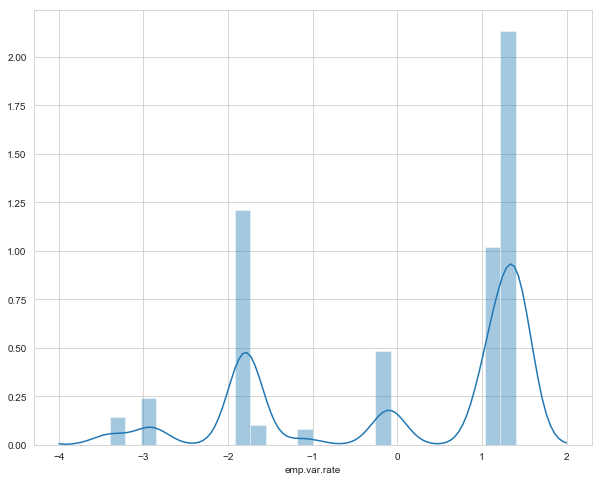

In [331]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["emp.var.rate"])
plt.show()

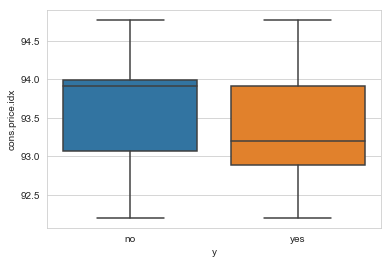

In [332]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.price.idx")
plt.show()

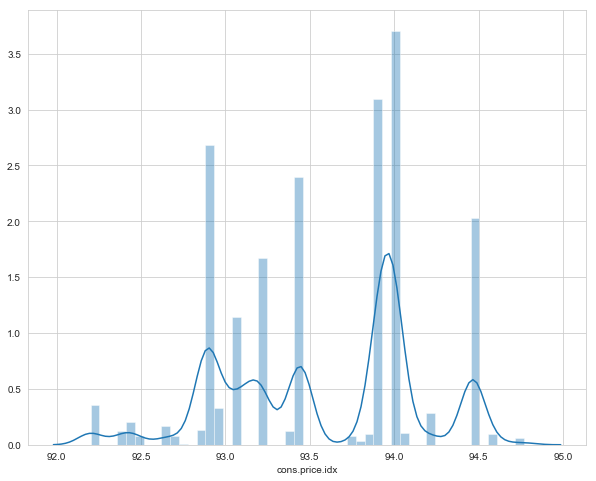

In [333]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.price.idx"])
plt.show()

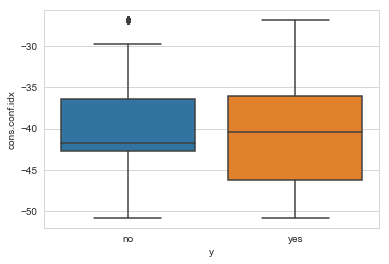

In [334]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="cons.conf.idx")
plt.show()

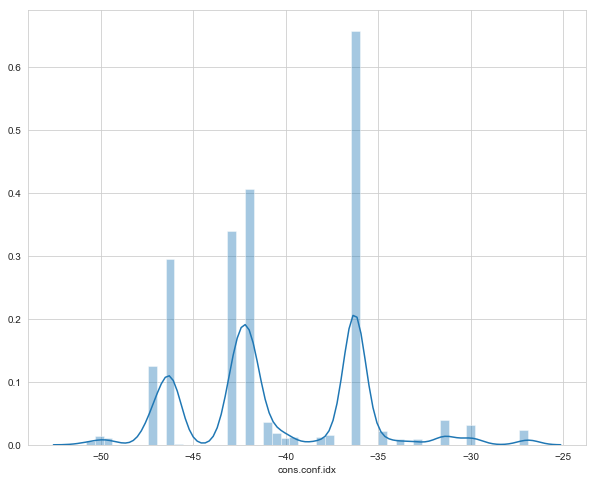

In [335]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["cons.conf.idx"])
plt.show()

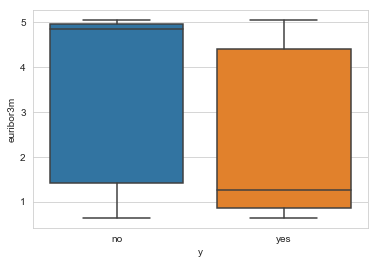

In [336]:
%matplotlib inline
sns.boxplot(data=data, x="y", y="euribor3m")
plt.show()

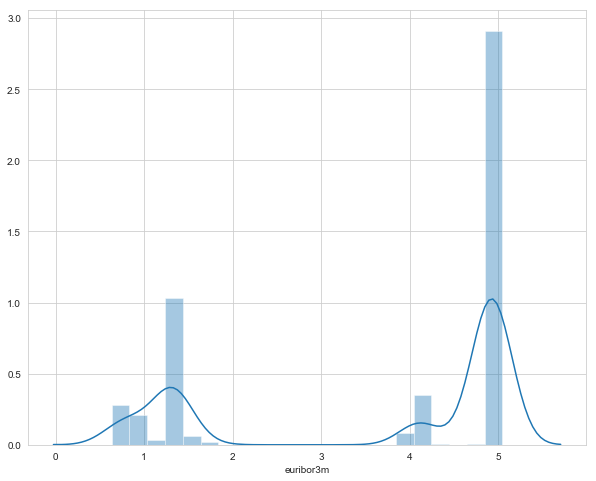

In [337]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["euribor3m"])
plt.show()

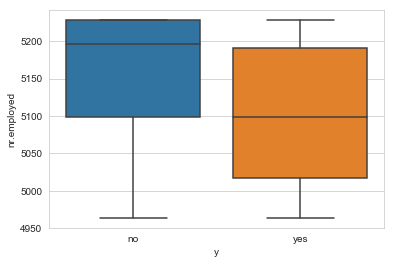

In [338]:

%matplotlib inline
sns.boxplot(data=data, x="y", y="nr.employed")
plt.show()

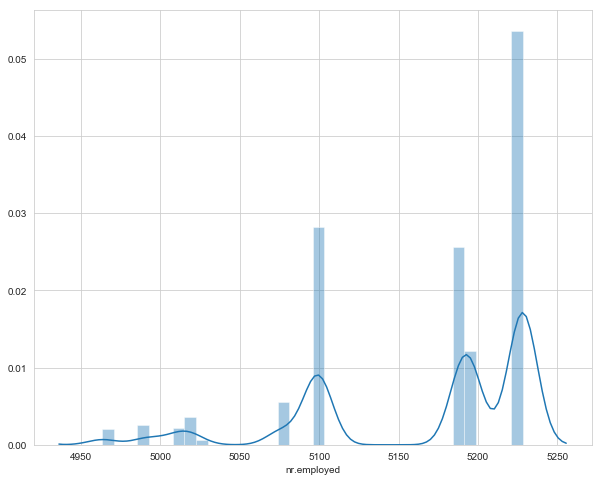

In [339]:
%matplotlib inline
plt.figure(figsize=(10,8))
sns.distplot(data["nr.employed"])
plt.show()

y
no     AxesSubplot(0.125,0.125;0.775x0.755)
yes    AxesSubplot(0.125,0.125;0.775x0.755)
Name: ModelPrediction, dtype: object

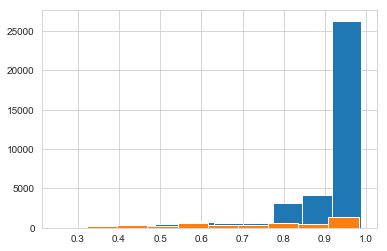

In [340]:
data.groupby('y').ModelPrediction.hist()

### Data Preprocessing for further modeling. 

In [341]:
# Cleaning the data and making it ready for modeling.
# Understanding the features well enough to do manual encoding ( changing few useful categorical columns to numeric) 

In [342]:
# Importing the libraries required for machine learning and preprocessing the data:
import pandas as pd
import pickle
from sklearn import preprocessing
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import roc_auc_score

##### First step in data cleaning is handling the missing values, but seeing the steps above(data.info()), there are no nulls in this dataset.

In [343]:
# Dropping the model prediction column from the dataset
data = data.drop(columns = ['ModelPrediction'])

In [344]:
# Handling the duplicate data.

data_dups = data[data.duplicated(keep = "last")]
data_dups

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
1265,39,blue-collar,married,basic.6y,no,no,no,telephone,may,thu,124,1,999,0,nonexistent,1.1,93.994,-36.4,4.855,5191.0,no
12260,36,retired,married,unknown,no,no,no,telephone,jul,thu,88,1,999,0,nonexistent,1.4,93.918,-42.7,4.966,5228.1,no
14155,27,technician,single,professional.course,no,no,no,cellular,jul,mon,331,2,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
16819,47,technician,divorced,high.school,no,yes,no,cellular,jul,thu,43,3,999,0,nonexistent,1.4,93.918,-42.7,4.962,5228.1,no
18464,32,technician,single,professional.course,no,yes,no,cellular,jul,thu,128,1,999,0,nonexistent,1.4,93.918,-42.7,4.968,5228.1,no
20072,55,services,married,high.school,unknown,no,no,cellular,aug,mon,33,1,999,0,nonexistent,1.4,93.444,-36.1,4.965,5228.1,no
20531,41,technician,married,professional.course,no,yes,no,cellular,aug,tue,127,1,999,0,nonexistent,1.4,93.444,-36.1,4.966,5228.1,no
25183,39,admin.,married,university.degree,no,no,no,cellular,nov,tue,123,2,999,0,nonexistent,-0.1,93.200,-42.0,4.153,5195.8,no
28476,24,services,single,high.school,no,yes,no,cellular,apr,tue,114,1,999,0,nonexistent,-1.8,93.075,-47.1,1.423,5099.1,no
32505,35,admin.,married,university.degree,no,yes,no,cellular,may,fri,348,4,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1,no


In [345]:
#Getting the count of duplicated values
data_dups.shape

(12, 21)

In [346]:
#### Looks like we have 12 duplicated rows. SO dropping the duplicate rows is adviced.
data = data.drop_duplicates()

In [347]:
data.shape

(41176, 21)

### Get the target (class variable) and independent features

In [348]:
data_x = data.iloc[:, :-1]
print("Shape of X: ", data_x.shape)

Shape of X:  (41176, 20)


In [349]:
data_y = data['y']
print('Shape of Y: ', data_y.shape)

Shape of Y:  (41176,)


### Splitting the data into train and test sets

In [350]:
X_rest, X_test, y_rest, y_test = train_test_split(data_x, data_y, test_size = 0.2)
X_train, X_cv, y_train, y_cv = train_test_split(X_rest, y_rest, test_size =0.2)

In [351]:
print("X Train:", X_train.shape)
print("X CV:", X_cv.shape)
print("X Test:", X_test.shape)
print("Y Train:", y_train.shape)
print("Y CV:", y_cv.shape)
print("Y Test:", y_test.shape)

X Train: (26352, 20)
X CV: (6588, 20)
X Test: (8236, 20)
Y Train: (26352,)
Y CV: (6588,)
Y Test: (8236,)


In [352]:
# Label encoding-  replacing the "Nos" with 0 and "Yes'" with 1

y_train.replace({'no' : 0, "yes" : 1}, inplace = True)
y_cv.replace({'no' : 0, "yes" : 1}, inplace = True)
y_test.replace({'no' : 0, "yes" : 1}, inplace = True)

### Encoding Categorical Features  - Two methods for encoding are 'One hot encoding' and 'Response encoding'. But i am using 'One Hot Encoding'.

In [353]:
# One big step before training any machine learning model is converting the categorical variables to numerical values.
# Some high efficient algos do but many machine learning algorithms cannot operate on label data directly.
# They require all input variables and output variables to be numeric.
# This means that categorical data must be converted to a numerical form.
# We perfrom this method when no natural ordering is present in the categorial values. 

In [354]:
#Categorical condition to extract categorical columns 
categorical_condn = data_x.dtypes == object

In [355]:
categorical_condn

age               False
job                True
marital            True
education          True
default            True
housing            True
loan               True
contact            True
month              True
day_of_week        True
duration          False
campaign          False
pdays             False
previous          False
poutcome           True
emp.var.rate      False
cons.price.idx    False
cons.conf.idx     False
euribor3m         False
nr.employed       False
dtype: bool

In [356]:
# Filtering the categorical columns and printing out
categorical_cols = data_x.columns[categorical_condn].tolist()

In [357]:
categorical_cols

['job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome']

In [358]:
from sklearn.feature_extraction.text import CountVectorizer

def add_onehot_to_dataframe(sparse, df, vectorizer, name):
    for i, col in enumerate(vectorizer.get_feature_names()):
        colname = name+"_"+col
        df[colname] = sparse[:, i].toarray().ravel().tolist()
        
    return df
def OneHotEncoder(categorical_cols, X_train, X_test, X_cv = None, include_cv = False):
    for i in categorical_cols:
        Vectorizer = CountVectorizer(token_pattern="[A-Za-z0-9-.]+")
        print("Encoding for feature: ", i)
        temp_cols = Vectorizer.fit_transform(X_train[i])
        X_train = add_onehot_to_dataframe(temp_cols, X_train, Vectorizer, i)
        if include_cv:
            temp_cols = Vectorizer.transform(X_cv[i])
            X_cv = add_onehot_to_dataframe(temp_cols, X_cv, Vectorizer, i)
            
        temp_cols = Vectorizer.transform(X_test[i])
        X_test = add_onehot_to_dataframe(temp_cols, X_test, Vectorizer, i)
        

In [359]:
OneHotEncoder(categorical_cols, X_train, X_test, X_cv, True)

Encoding for feature:  job


/Users/aishwaryamaddimsetty/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



Encoding for feature:  marital
Encoding for feature:  education
Encoding for feature:  default
Encoding for feature:  housing
Encoding for feature:  loan
Encoding for feature:  contact
Encoding for feature:  month
Encoding for feature:  day_of_week
Encoding for feature:  poutcome


In [360]:
#Droping the categorical columns once encoding is done
X_train = X_train.drop(categorical_cols, axis = 1)
X_cv = X_cv.drop(categorical_cols, axis = 1)
X_test = X_test.drop(categorical_cols, axis = 1)

print("Shape of train:", X_train.shape)
print("Shape of CV:", X_cv.shape)
print("Shape of test:", X_test.shape)

Shape of train: (26352, 63)
Shape of CV: (6588, 63)
Shape of test: (8236, 63)


In [361]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26352 entries, 25384 to 16332
Data columns (total 63 columns):
age                              26352 non-null int64
duration                         26352 non-null int64
campaign                         26352 non-null int64
pdays                            26352 non-null int64
previous                         26352 non-null int64
emp.var.rate                     26352 non-null float64
cons.price.idx                   26352 non-null float64
cons.conf.idx                    26352 non-null float64
euribor3m                        26352 non-null float64
nr.employed                      26352 non-null float64
job_admin.                       26352 non-null int64
job_blue-collar                  26352 non-null int64
job_entrepreneur                 26352 non-null int64
job_housemaid                    26352 non-null int64
job_management                   26352 non-null int64
job_retired                      26352 non-null int64
job_self-empl

In [362]:
#Printing the dataset to ensure our whole dataset is numeric now.
X_train.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
25384,58,158,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
40090,59,410,2,999,0,-1.7,94.215,-40.3,0.827,4991.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
25284,31,84,4,999,0,-0.1,93.200,-42.0,4.153,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
6368,57,205,8,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
37023,25,112,1,999,1,-2.9,92.469,-33.6,1.044,5076.2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [363]:
pd.set_option('display.max_columns', None)
X_train.head(5)

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_divorced,marital_married,marital_single,marital_unknown,education_basic.4y,education_basic.6y,education_basic.9y,education_high.school,education_illiterate,education_professional.course,education_university.degree,education_unknown,default_no,default_unknown,default_yes,housing_no,housing_unknown,housing_yes,loan_no,loan_unknown,loan_yes,contact_cellular,contact_telephone,month_apr,month_aug,month_dec,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,day_of_week_fri,day_of_week_mon,day_of_week_thu,day_of_week_tue,day_of_week_wed,poutcome_failure,poutcome_nonexistent,poutcome_success
25384,58,158,1,999,0,-0.1,93.200,-42.0,4.153,5195.8,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
40090,59,410,2,999,0,-1.7,94.215,-40.3,0.827,4991.6,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,1,0
25284,31,84,4,999,0,-0.1,93.200,-42.0,4.153,5195.8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0
6368,57,205,8,999,0,1.1,93.994,-36.4,4.857,5191.0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0
37023,25,112,1,999,1,-2.9,92.469,-33.6,1.044,5076.2,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,0


In [364]:
# Just a best practice step - saving the encoded dataset to local computer. (Can be used for small excell filtering too in needed)
data_x.to_csv("encoded_data_x.csv")

In [365]:
# Advice before building any model on this dataset is to drop the 'Duration' column , due to it's high correlation with the target variable.

# Above step concludes the data processing and prepping the data for further machine learning training on the dataset.

In [366]:
# Creating a simple machine learning model - I've picked logistic regression model here for the reason that, 
# it best fits our dataset in case of a textbook defination in my view.
# We have a binary classification model. so hence a logistic regression model.

In [367]:
# Building the model with 'Duration' column. 

### Building Logistic Regression model 

In [372]:
data.shape

(41176, 21)

In [ ]:
data_new.shape

In [ ]:
contact = ({'cellular':0, 'telephone':1})
data_new['contact'] = data_new['contact'].map(contact)

In [ ]:
data_new = pd.get_dummies(data_new, columns = ['job','marital','education','default',
                                   'housing','loan','month',
                                   'day_of_week','poutcome'], drop_first = True)

In [ ]:
data_new.shape

In [ ]:
# Importing required scikit learn's libraries

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
import warnings
warnings.filterwarnings('ignore')
print('.....Setup complete')
import os

In [ ]:

#group data into X set and y set, where X has all features and y has the label 
X = data_new.loc[:,data_new.columns != 'y']
y = data_new.loc[:,data_new.columns == 'y']

X_train,X_test,y_train,y_test = train_test_split(X,y, test_size = 0.3 , random_state = 0)

In [ ]:

#print lenght of both test and train set
print('shape of X_train : ',len(X_train), '\nshape of y_train : ',len(y_train))
print('\nshape of X_test  : ',len(X_test), '\nshape of y_test  : ',len(y_test))

In [ ]:
#Normalize the data 
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [ ]:
#train model using logistic regression
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression()
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

In [ ]:
clf.score(X_test,y_test)

In [ ]:
#predict X_test and save in variable y_pred
y_pred = clf.predict(X_test)

In [ ]:
#Evaluate the model
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
cm

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

### using correlation matrix to understand the corr between numerical values 

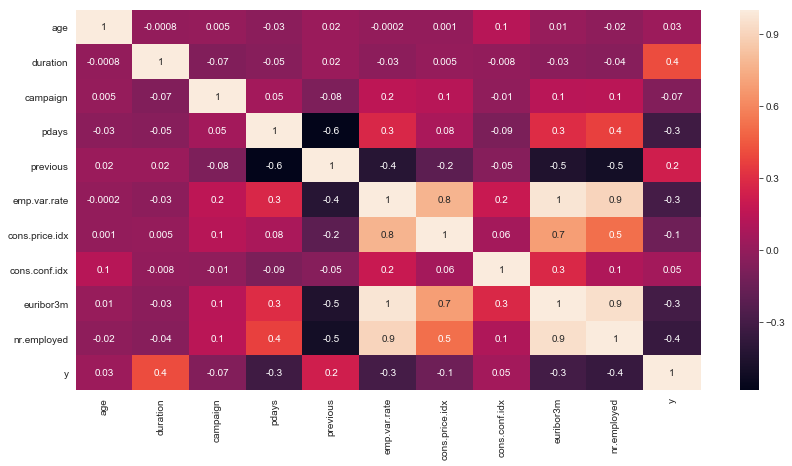

In [374]:
data_copy = data
y_bin = ({'no' :0, 'yes':1})
data_copy['y'] = data_copy['y'].map(y_bin)
plt.figure(figsize=(14,7))
cor = data.corr()
sns.heatmap(cor, annot = True, fmt ='.1g')
plt.show()